In [4]:
# Quantum Phase Estimation
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram

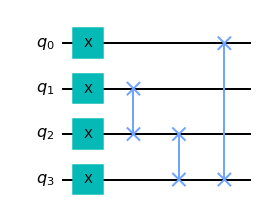

In [5]:
_7k_mod15 = QuantumCircuit(4)
_7k_mod15.x([0, 1, 2, 3])
_7k_mod15.swap(1, 2)
_7k_mod15.swap(2, 3)
_7k_mod15.swap(0, 3)
display(_7k_mod15.draw('mpl'))

In [6]:
def _7EPXn_mod15(n):
    circ = QuantumCircuit(4)
    for k in range(n):
        circ = circ.compose(_7k_mod15, qubits=[0, 1, 2, 3])
    
    gate = circ.to_gate(label='(7^'+str(n)+') mod 15')
    return gate.control(1, ctrl_state='1')

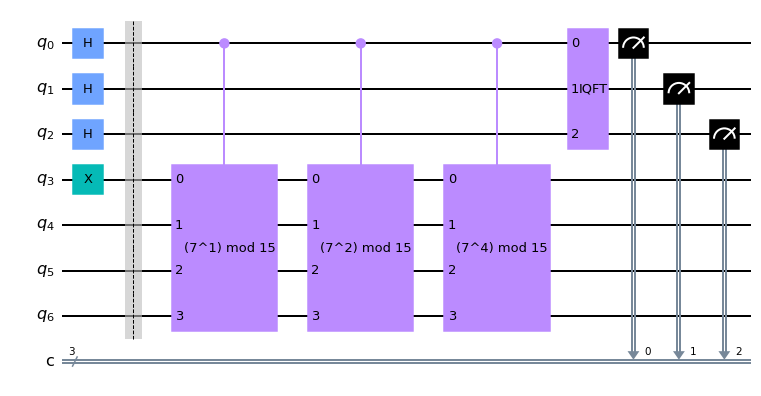

In [7]:
circ = QuantumCircuit(7, 3)
circ.h([0, 1, 2])
circ.x(3)
circ.barrier()

circ.append(_7EPXn_mod15(1), [0, 3, 4, 5, 6])
circ.append(_7EPXn_mod15(2), [0, 3, 4, 5, 6])
circ.append(_7EPXn_mod15(4), [0, 3, 4, 5, 6]) # not needed

circ.append(QFT(3).inverse(), [0, 1, 2])
circ.measure([0, 1, 2], [0, 1, 2])

display(circ.draw('mpl'))